In [1]:
# Load data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Specify columns from original csv to load into DataFrame
all_cols = ['Polygon_ID',
'acq_date',
'frp',
'acq_time',
'ELEV_sum',
'ELEV_mean',
'SLP_sum',
'SLP_mean',
'EVT_sum',
'EVT_mean',
'EVH_sum',
'EVH_mean',
'EVC_sum',
'EVC_mean',
'CBD_sum',
'CBD_mean',
'CBH_sum',
'CBH_mean',
'CC_sum',
'CC_mean',
'CH_sum',
'CH_mean',
'c_latitude',
'c_longitude',
'TEMP_min',
'TEMP_max',
'PRCP',
'SNOW',
'WDIR_ave',
'WSPD_ave',
'PRES_ave',
'WCOMP']

In [4]:
# Load data with specified columns, downloaded from https://zenodo.org/doi/10.5281/zenodo.5636428
df = pd.read_csv("features_array.csv", sep = "\t", index_col=False, usecols=all_cols)

In [5]:
# Some cells in FRP column have two values because the satellite may collect two values at a given time for the same location
# Select just the first value in the cell
df['frp'] = df['frp'].str.split(',').str[0]

# Show first 5 rows
df.head()

,Polygon_ID,acq_date,frp,acq_time,ELEV_sum,ELEV_mean,SLP_sum,SLP_mean,EVT_sum,EVT_mean,...,c_latitude,c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,110736,2015-11-29,3.1,2049,0.0,0.0,0.0,0.0,439.0,2.814103,...,-2.350676e+06,2.292255e+06,5.2,0.0,14.0,0.0,0.0,144.3,15.4,1021.4
1,180401,2014-11-17,2.9,"2204,2023",0.0,0.0,0.0,0.0,1445.0,9.262820,...,-2.347301e+06,2.297130e+06,9.0,4.0,17.0,0.0,0.0,157.2,13.4,1022.5
2,490116,2015-01-13,8.3,2053,0.0,0.0,0.0,0.0,1906.0,13.236111,...,-2.332301e+06,2.284005e+06,10.5,7.0,18.0,0.0,0.0,350.4,6.1,1022.9
3,746188,2013-04-14,1.2,"904,904",0.0,0.0,0.0,0.0,0.0,0.000000,...,-2.319926e+06,2.064255e+06,13.8,7.8,21.7,0.0,0.0,322.3,19.9,1011.5
4,792264,2014-08-08,6.6,1034,0.0,0.0,0.0,0.0,1962.0,12.576923,...,-2.317676e+06,2.205255e+06,24.8,14.4,35.6,0.0,0.0,NaN,7.9,1011.2


In [6]:
# Select all rows where fire was from 2016
fires = df[df['acq_date'].str.contains(pat = '2016')]

In [7]:
# Drop all NaN values
fires = fires.dropna()

In [8]:
# Show statistics about each parameter
fires.describe()

,Polygon_ID,ELEV_sum,ELEV_mean,SLP_sum,SLP_mean,EVT_sum,EVT_mean,EVH_sum,EVH_mean,EVC_sum,...,c_latitude,c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
count,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,...,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06
mean,4.861333e+07,9.786109e+04,4.378442e+02,8.447159e+02,4.146249e+00,3.420929e+04,1.834133e+02,2.945649e+04,1.577840e+02,1.443993e+06,...,-1.443879e+03,1.576397e+06,1.653057e+01,9.326175e+00,2.388053e+01,5.930513e-01,4.411646e-01,1.938789e+02,1.287399e+01,1.016778e+03
std,2.174733e+07,1.520750e+05,5.875512e+02,1.601243e+03,6.492941e+00,2.282484e+04,9.994769e+01,2.007535e+04,8.754295e+01,4.977807e+05,...,1.053354e+06,5.502961e+05,7.461432e+00,8.122309e+00,7.668156e+00,3.960400e+00,6.971060e+00,9.229894e+01,6.448018e+00,6.251638e+00
min,4.203830e+05,-3.568000e+03,-1.147917e+01,0.000000e+00,0.000000e+00,8.800000e+01,1.100000e+01,8.800000e+01,1.100000e+01,2.919100e+04,...,-2.335676e+06,3.636304e+05,-2.390000e+01,-3.220000e+01,-1.990000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.865000e+02
25%,3.741514e+07,1.629300e+04,8.550000e+01,7.400000e+01,4.305556e-01,1.820500e+04,1.018368e+02,1.552700e+04,9.064984e+01,1.145784e+06,...,-5.439262e+05,1.166505e+06,1.130000e+01,2.800000e+00,1.940000e+01,0.000000e+00,0.000000e+00,1.325000e+02,8.600000e+00,1.013000e+03
50%,4.920718e+07,4.399200e+04,2.410000e+02,2.880000e+02,1.673077e+00,3.097300e+04,1.803846e+02,2.638200e+04,1.469444e+02,1.237519e+06,...,2.719876e+04,1.545255e+06,1.660000e+01,8.900000e+00,2.410000e+01,0.000000e+00,0.000000e+00,1.937000e+02,1.190000e+01,1.016800e+03
75%,6.519202e+07,9.324000e+04,4.611875e+02,7.880000e+02,4.391025e+00,4.738400e+04,2.613269e+02,4.061400e+04,2.305680e+02,1.382852e+06,...,8.015738e+05,1.974630e+06,2.180000e+01,1.560000e+01,2.940000e+01,0.000000e+00,0.000000e+00,2.700000e+02,1.590000e+01,1.020900e+03
max,9.294402e+07,1.118260e+06,3.533868e+03,1.444800e+04,4.630769e+01,1.805670e+05,3.989586e+02,1.543290e+05,3.100000e+02,3.964689e+06,...,2.145949e+06,3.150255e+06,3.870000e+01,3.200000e+01,4.560000e+01,2.850000e+02,4.300000e+02,3.600000e+02,5.980000e+01,1.042000e+03


In [9]:
fires

,Polygon_ID,acq_date,frp,acq_time,ELEV_sum,ELEV_mean,SLP_sum,SLP_mean,EVT_sum,EVT_mean,...,c_latitude,c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
78,1395647,2016-11-04,18.2,2053,0.0,0.000000,0.0,0.000000,56920.0,168.40237,...,-2.288426e+06,2.390130e+06,13.7,9.4,17.8,0.0,0.0,171.6,14.0,1019.6
79,1395715,2016-11-17,8.0,2010,0.0,0.000000,0.0,0.000000,51824.0,153.32544,...,-2.288426e+06,2.364630e+06,8.0,4.4,12.8,0.0,0.0,158.1,7.4,1020.8
90,1411133,2016-10-22,1.1,1014,0.0,0.000000,0.0,0.000000,74778.0,221.23668,...,-2.287676e+06,2.389380e+06,11.0,8.3,14.4,0.0,0.0,129.9,11.1,1014.0
335,1659913,2016-05-20,0.7,"1022,1022",0.0,0.000000,0.0,0.000000,81962.0,242.49112,...,-2.275676e+06,2.000880e+06,13.8,11.0,17.0,0.0,0.0,275.8,24.7,1007.6
337,1659913,2016-08-03,0.7,1015,0.0,0.000000,0.0,0.000000,81962.0,242.49112,...,-2.275676e+06,2.000880e+06,17.1,8.0,29.0,0.0,0.0,211.4,8.3,1013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820781,88539211,2016-06-19,0.9,554,64446.0,190.668640,3650.0,10.798817,28648.0,169.51479,...,1.932574e+06,2.535630e+06,19.6,7.2,31.1,0.0,0.0,267.8,0.9,1025.9
17820787,89592647,2016-07-21,0.2,554,64860.0,191.893500,1250.0,3.698225,45901.0,141.23384,...,1.983574e+06,2.339130e+06,24.1,16.1,32.2,0.0,0.0,249.5,15.1,1019.3
17820790,89669628,2016-05-11,4.3,1750,38984.0,124.948715,1016.0,3.256410,45964.0,147.32051,...,1.987324e+06,2.503755e+06,15.9,6.1,23.3,0.0,0.0,355.2,11.0,1018.9
17820799,90057076,2016-12-04,1.0,645,19836.0,63.576923,136.0,0.871795,13570.0,43.49359,...,2.006074e+06,2.373255e+06,0.6,-5.6,6.1,0.0,0.0,320.4,15.5,1021.2


In [16]:
# Convert frp column from string to float type
fires['frp'] = fires['frp'].astype('float')

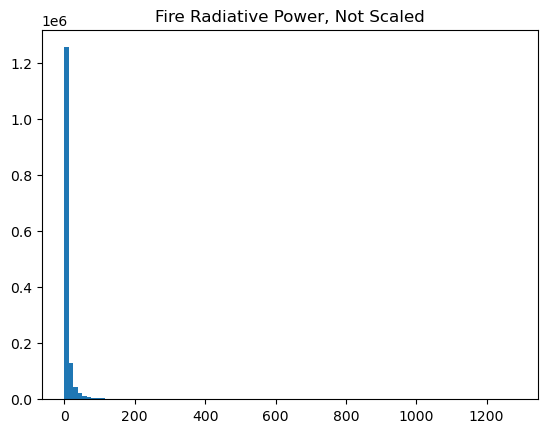

In [17]:
# Plot frequencies of Fire Radiative Power
plt.hist(fires['frp'], bins=100)
plt.title("Fire Radiative Power, Not Scaled")
plt.show()

In [18]:
# Because FRP are skewed, create new column with log transform
# Method from https://aosmith.rbind.io/2018/09/19/the-log-0-problem/
fires['frp_scaled'] = np.log10(fires['frp'] + 1)

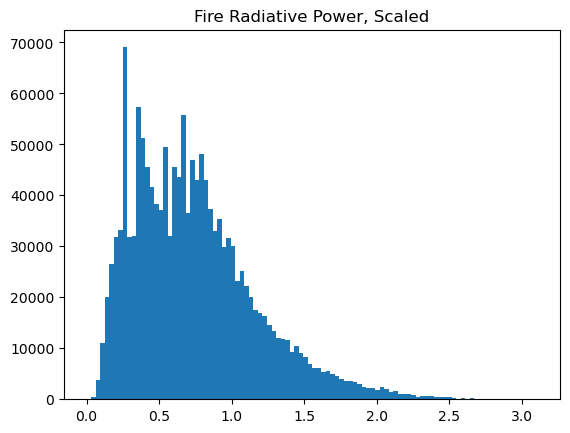

In [19]:
# Plot frequencies of Fire Radiative Power with log transform
plt.hist(fires['frp_scaled'], bins=100)
plt.title("Fire Radiative Power, Scaled")
plt.show()

Text(0.5, 1.0, 'Parameters that Correlate with Fire Radiative Power (FRP)')

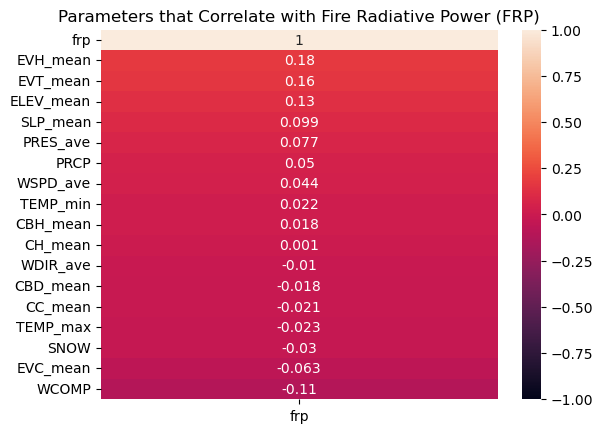

In [21]:
# Correlation heat map between various parameters
cols = ['frp',
'ELEV_mean',
'SLP_mean',
'EVT_mean',
'EVH_mean',
'EVC_mean',
'CBD_mean',
'CBH_mean',
'CC_mean',
'CH_mean',
'TEMP_min',
'TEMP_max',
'PRCP',
'SNOW',
'WDIR_ave',
'WSPD_ave',
'PRES_ave',
'WCOMP']

heatmap = sns.heatmap(fires[cols].corr()[['frp']].sort_values(by='frp', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Parameters that Correlate with Fire Radiative Power (FRP)')

In [22]:
# Select subset of parameters that have relatively higher correlation
cols = ['ELEV_mean',
'SLP_mean',
'EVT_mean',
'EVH_mean',
'TEMP_min',
'TEMP_max',
'PRCP',
'WSPD_ave',
'PRES_ave']

## Predict with K-Nearest Neighbors Algorithm

- Code references tutorial https://www.askpython.com/python/examples/python-predict-function

In [23]:
X = fires[cols]          # Independent variables
Y = fires['frp_scaled']  # Dependent variable

# Separate 80% data into training set and 20% into test set
# random_state=0 ensures that the results are reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [24]:
# Applying k-nearest neighbors model
KNN_model = KNeighborsRegressor(n_neighbors=12).fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) # Predictions on testing data

In [25]:
# Print the scaled mean squared error
error = mean_squared_error(Y_test, KNN_predict)
print("Mean Squared Error (Scaled):", error)

# Calculate the absolute errors
errors = abs(KNN_predict - Y_test)

# Print the mean absolute error (MAE)
print('Mean Absolute Error (Scaled):', np.mean(errors))

Mean Squared Error (Scaled): 0.05622150334352182
Mean Absolute Error (Scaled): 0.16534501308119112


## Predict with Decision Tree Algorithm

- Code references tutorial https://www.askpython.com/python/examples/python-predict-function

In [26]:
# Separate data without scaled FRP values

X = fires[cols]  # Independent variables
Y = fires['frp']  # Dependent variable

# Separate 80% data into training set and 20% into test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [27]:
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) # Predictions on testing data

In [28]:
# Print root mean square error (RMSE)
error = mean_squared_error(Y_test, DT_predict)
print("Root Mean Squared Error:", error**0.5)

# Calculate the absolute errors
errors = abs(DT_predict - Y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', np.mean(errors))

Root Mean Squared Error: 25.457777153918286
Mean Absolute Error: 9.413833581960164


## Predict with Random Forest

- Code references article https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165
- Based on parameters used by Singla et al., the team behind WildfireDB https://openreview.net/pdf?id=6nblryHxVbO

In [29]:
RF_model = RandomForestRegressor(n_estimators = 50, max_depth = 30, max_samples=5000).fit(X_train, Y_train)
RF_predict = RF_model.predict(X_test) # Predictions on testing data

In [30]:
# Print root mean square error (RMSE)
error = mean_squared_error(Y_test, RF_predict)
print("Root Mean Squared Error:", error**0.5)

# Calculate the absolute errors
errors = abs(RF_predict - Y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', np.mean(errors))

Root Mean Squared Error: 24.303218880217212
Mean Absolute Error: 9.34091218420133
